In [13]:
import tensorflow_probability.substrates.jax as tfp
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import jax
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [2]:
dist = tfp.distributions

In [3]:
normal = dist.Normal(loc = 0., scale = 1.)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

### Properties of RV

In [5]:
normal.mean()

DeviceArray(0., dtype=float32)

In [7]:
normal.loc

DeviceArray(0., dtype=float32)

In [8]:
normal.scale

DeviceArray(1., dtype=float32)

In [10]:
normal.stddev()

DeviceArray(1., dtype=float32)

In [11]:
normal.entropy()

DeviceArray(1.4189385, dtype=float32)

### Drawing samples

In [15]:
key = jax.random.PRNGKey(0)
sample = normal.sample(seed = key, sample_shape = [1000, ])

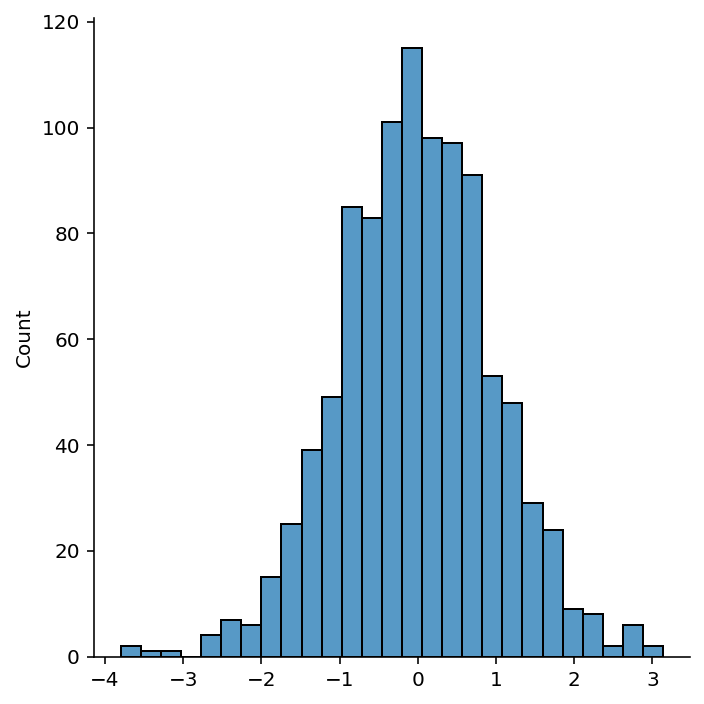

In [16]:
sns.displot(sample)

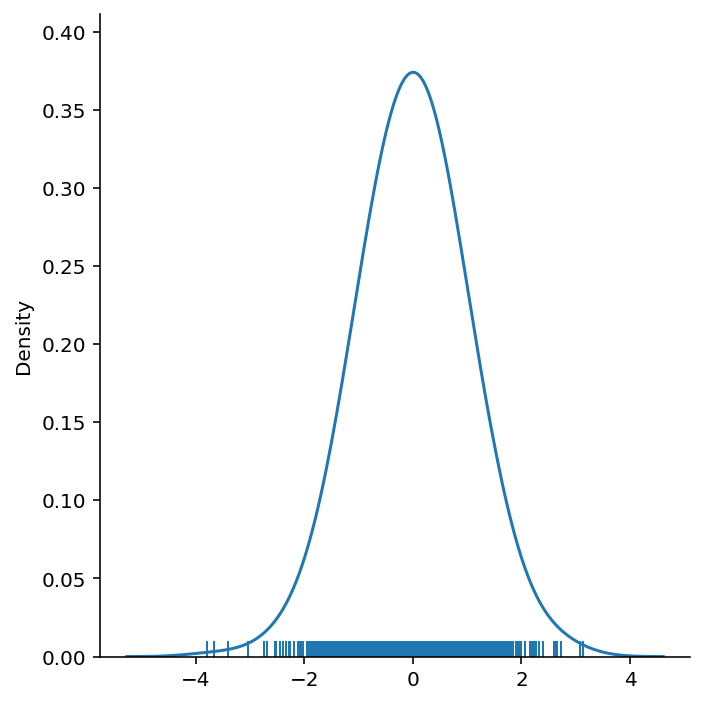

In [17]:
sns.displot(sample, kind='kde',bw_adjust=2, rug=True)

### Finding pdf at a given point

In [19]:
normal.log_prob(1.)

DeviceArray(-1.4189385, dtype=float32)

### Plotting pdf over given range

In [21]:
x = jnp.linspace(-5., 5., 100)

pdf_x = jnp.exp(normal.log_prob(x))

Text(0, 0.5, 'PDF')

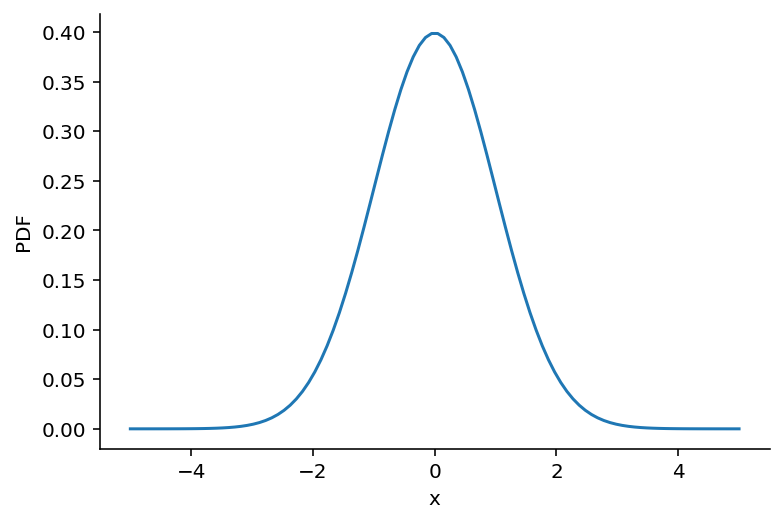

In [22]:
plt.plot(x, pdf_x)
plt.xlabel("x")
plt.ylabel("PDF")

### Finding cdf at a given point

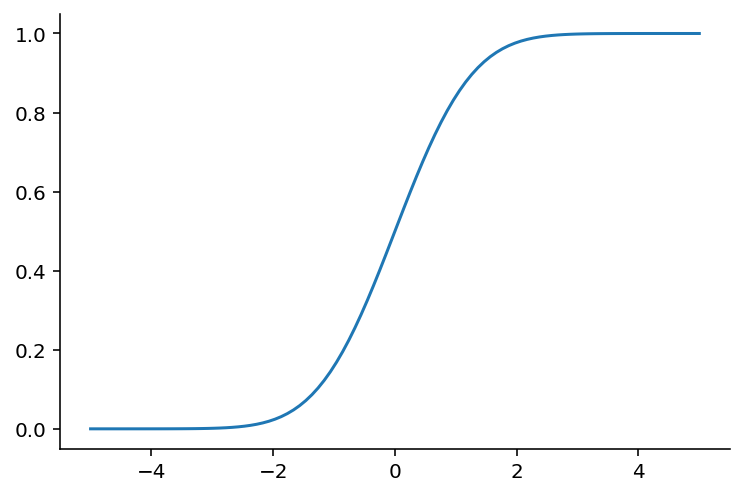

In [23]:
plt.plot(x, normal.cdf(x))

In [30]:
perplexity = jnp.power(jnp.e, normal.entropy())
perplexity

DeviceArray(4.132731, dtype=float32)